In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.io import fits as pf
from astropy.io import ascii
import random
from astropy.table import Table, Column

Problem 1
 
(c)


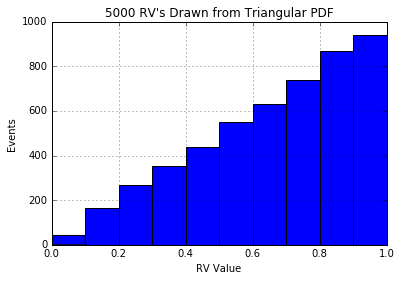

In [3]:
print 'Problem 1'
print ' '
print '(c)'

x = np.random.random(5000)
y = np.sqrt(x)

plt.grid(True)
plt.xlabel('RV Value')
plt.ylabel('Events')
plt.title('5000 RV\'s Drawn from Triangular PDF')
x, hist, bins = plt.hist(y, bins = 10, range = (0.0,1.0))
plt.show()

Problem 2
 
(c)


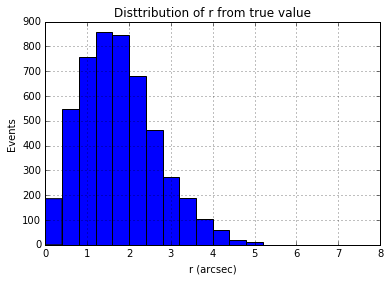

Percent of r<=3 is 89.720000


In [19]:
print 'Problem 2'
print ' '
print '(c)'
xi = np.random.normal(0.,1.4,5000)
yi = np.random.normal(0.,1.4,5000)
ri = np.sqrt(xi**2 + yi**2)

plt.grid(True)
plt.xlabel('r (arcsec)')
plt.ylabel('Events')
plt.title('Disttribution of r from true value')
x, hist, bins = plt.hist(ri, bins = 20, range = (0.0,8.0))
plt.show()

rmasked = ri[ri<=3.0]
total = float(len(ri))
_sum = float(len(rmasked))
perc = (_sum/total)*100.

print 'Percent of r<=3 is %f'%(perc)

Problem 3
 
(a)
 
X variance = 1.051899
Y variance = 0.084380
XY covariance = 0.267210
Sample correlation coefficient r = 0.896905
 
(b)
 
r is 14.819301 sigmas from the mean
Since r > 2 sigmas from the mean, we reject the null hypthesis at (far) over 95% confidence
 
(c)
 
a = -10.693325, b = 0.254027


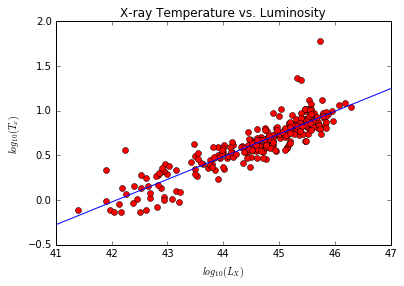

In [45]:
print 'Problem 3'
print ' '

datadir = 'Data'
file0 = 'lx_t.dat'

xray = ascii.read('%s/%s' %(datadir,file0))
xray

xlum = xray['L'].data
xtemp = xray['T'].data

x = np.log10(xlum)
y = np.log10(xtemp)
xmean = np.mean(x)
ymean = np.mean(y)

_n = len(x) - 1

xvar = 0
yvar = 0
cov = 0

for i,j in zip(x,y):
    xx = (i-xmean)**2
    yy = (j-ymean)**2
    xy = (i-xmean)*(j-ymean)
    xvar = xvar + xx
    yvar = yvar + yy
    cov = cov + xy

    
xvar = xvar/_n
yvar = yvar/_n
cov = cov/_n
corcoef = cov/np.sqrt(xvar*yvar)
sample_sig = 1/np.sqrt(len(x))
nsigs = corcoef/sample_sig


print '(a)'
print ' '
print 'X variance = %f' %(xvar)
print 'Y variance = %f' %(yvar)
print 'XY covariance = %f' %(cov)
print 'Sample correlation coefficient r = %f' %(corcoef)
print ' '
print '(b)'
print ' '
print 'r is %f sigmas from the mean' %(nsigs)
print 'Since r > 2 sigmas from the mean, we reject the null hypthesis at (far) over 95% confidence'

print ' '
print '(c)'
print ' '

a = ymean - (cov/xvar)*xmean
b = cov/xvar
print 'a = %f, b = %f' %(a,b)

_x = np.linspace(41.,47.,100)
ymodel = ymean + (cov/xvar)*(_x - xmean)

plt.title('X-ray Temperature vs. Luminosity')
plt.xlabel('$log_{10}(L_X)$')
plt.ylabel('$log_{10}(T_x)$')
plt.plot(x,y,'ro')
plt.plot(_x,ymodel)
plt.show()